In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


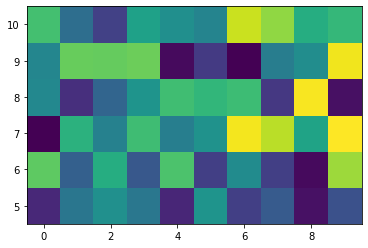

In [2]:
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

In [21]:
max_iter = 10
low = 0.49
high = 0.51
a = [v * low for v in (int(max_iter/2)*[1])]
b = [v * high for v in (int(max_iter/2)*[1])]

c = []
for i, j in zip(a, b):
    c.append(i)
    c.append(j)
c

[0.49, 0.51, 0.49, 0.51, 0.49, 0.51, 0.49, 0.51, 0.49, 0.51]

(-8, 8)

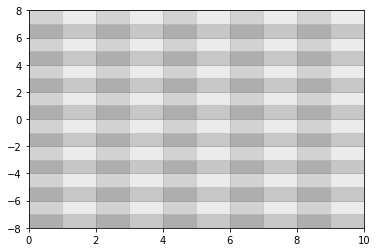

In [73]:
nx = 10
colorx = [16+3*(i%2) for i in range(nx)]
colorx_lim = [i for i in range(nx+1)]
ny = 2*8+1
colory = [16+3*(i%2) for i in range(ny)]
colory_lim = [i-8 for i in range(ny+1)]
fix, ax= plt.subplots()

cmap = matplotlib.cm.get_cmap('tab20c')
for i, c in enumerate(colorx):
    ax.axvspan(colorx_lim[i], colorx_lim[i+1], alpha=0.3, color=cmap.colors[c])
for i, c in enumerate(colory):
    ax.axhspan(colory_lim[i], colory_lim[i+1], alpha=0.3, color=cmap.colors[c])

ax.set_xlim(0, nx)
ax.set_ylim(-8, 8)

In [72]:
colory

[16, 18, 16, 18, 16, 18, 16, 18, 16, 18, 16, 18, 16, 18, 16, 18, 16]